Cantidad total de mediciones:  1411180
Cantidad de estaciones de medicion distintas:  133

Minimma cantidad de datos registrados en una estación:  802
Máxima cantidad de datos registrados en una estación:  20706


C:\Users\crist\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


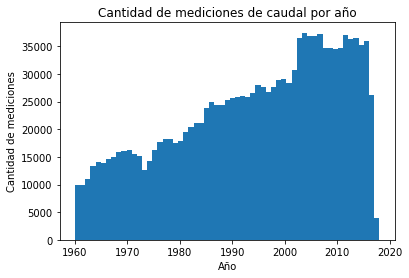

C:\Users\crist\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future



Datos con intervalo de 1 dia:  1405245   0.9958881596431586
Datos con intervalo mayor a 1 dia:  5802   0.004111840356841409

Datos faltantes de caudal:  0
Datos faltantes de precipitaciones:  27767
Datos faltantes de temperatura máxima:  151563


C:\Users\crist\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
C:\Users\crist\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


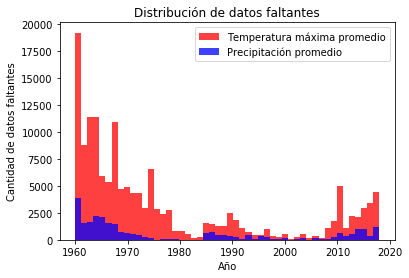

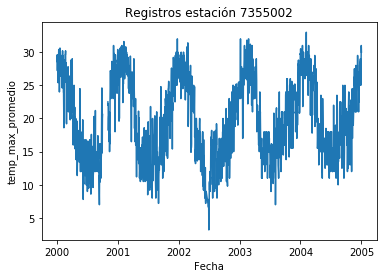

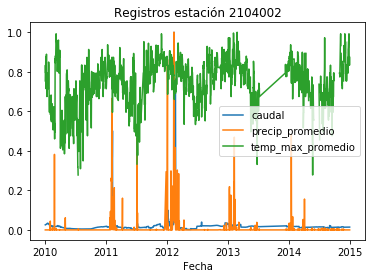

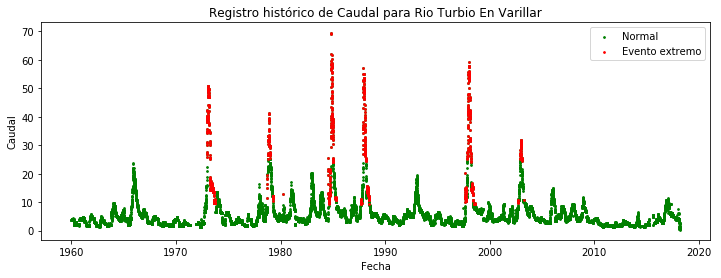

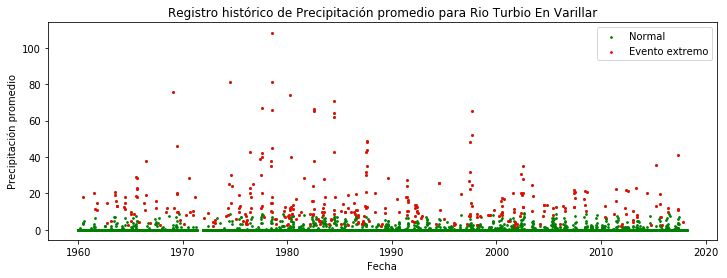

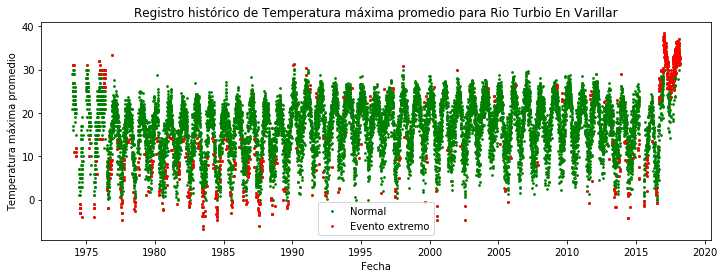

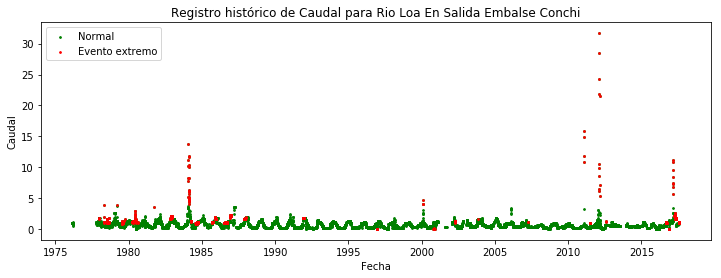

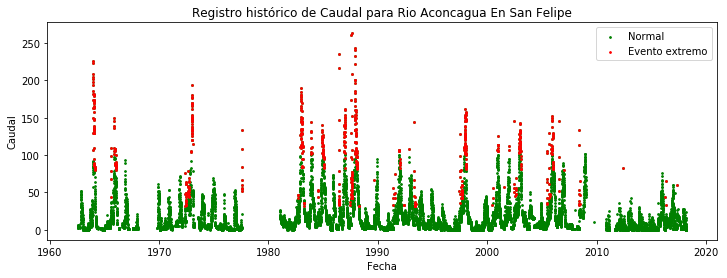

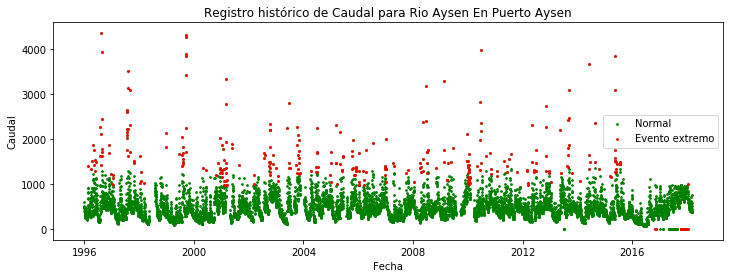

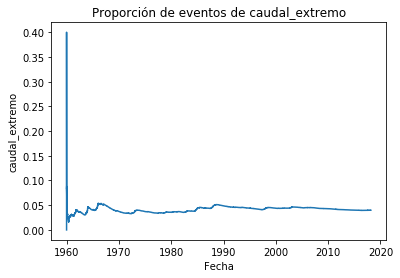

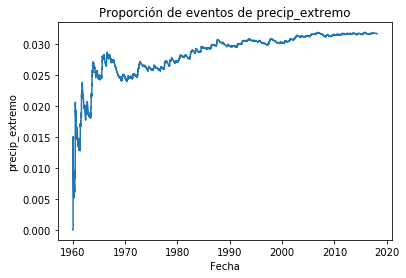

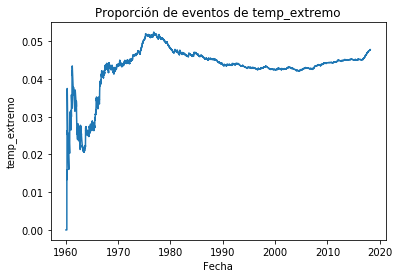

In [4]:
import import_ipynb
import os, funciones
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.close('all')


#Importación de dataset
datadir = os.path.join(Path(os.getcwd()).parent.parent, 'data')
dataset = pd.read_csv(os.path.join(datadir, 'caudal_extra.csv'), usecols=[4,11,12,15,16], header=0)
dataset = dataset.sort_values(by=['nombre', 'fecha'])

print('Cantidad total de mediciones: ', dataset.shape[0])
print('Cantidad de estaciones de medicion distintas: ', len(dataset.nombre.unique()))


#Analisis de mediciones por estación
cantiadad_mediciones = []
for i in dataset.nombre.unique():
    cantiadad_mediciones.append(dataset[dataset['nombre'] == i].shape[0])
        
print('\nMinimma cantidad de datos registrados en una estación: ', np.min(cantiadad_mediciones))
print('Máxima cantidad de datos registrados en una estación: ', np.max(cantiadad_mediciones))


#Analisis de mediciones por año
fechas_year = dataset.fecha.values.astype('datetime64[Y]')

plt.figure()
plt.hist(fechas_year, bins=59)
plt.xlabel('Año')
plt.ylabel('Cantidad de mediciones')
plt.title('Cantidad de mediciones de caudal por año')
plt.show()


#Analisis de mediciones dias entre mediciones
dias_entre_mediciones = []
for i in dataset.nombre.unique():
    fechas_estacion = dataset[dataset['nombre']==i].fecha.values.astype('datetime64[D]')
    dias_entre_mediciones = dias_entre_mediciones + list(np.diff(fechas_estacion).astype(int))
dias_entre_mediciones = np.asarray(dias_entre_mediciones)
print('\nDatos con intervalo de 1 dia: ', len(np.where(dias_entre_mediciones==1)[0]), ' ', len(np.where(dias_entre_mediciones==1)[0])/len(dias_entre_mediciones))
print('Datos con intervalo mayor a 1 dia: ', len(np.where(dias_entre_mediciones>1)[0]), ' ', len(np.where(dias_entre_mediciones>1)[0])/len(dias_entre_mediciones))


#Analisis de datos faltantes
print('\nDatos faltantes de caudal: ', dataset.caudal.isna().sum())
print('Datos faltantes de precipitaciones: ', dataset.precip_promedio.isna().sum())
print('Datos faltantes de temperatura máxima: ', dataset.temp_max_promedio.isna().sum())


#Analisis fechas de datos faltantes
fechas_preci_faltantes = dataset[dataset['precip_promedio'].isna()].fecha.values.astype('datetime64[Y]')
fechas_temps_faltantes = dataset[dataset['temp_max_promedio'].isna()].fecha.values.astype('datetime64[Y]')

plt.figure()
plt.hist(fechas_temps_faltantes, 50, alpha=0.75, facecolor='r')
plt.hist(fechas_preci_faltantes, 50, alpha=0.75, facecolor='b')
plt.legend(['Temperatura máxima promedio', 'Precipitación promedio'])
plt.xlabel('Año')
plt.ylabel('Cantidad de datos faltantes')
plt.title('Distribución de datos faltantes')
plt.show()


#Gráficos pedidos parte 2
estacion_1 = 7355002    #Rio Ancoa En El Morro
estacion_2 = 2104002    #Rio Loa En Salida Embalse Conchi
funciones.time_plot_una_estacion(estacion_1, 'temp_max_promedio', '2000-01-01', '2005-01-01')
funciones.time_plot_estaciones_varias_columnas(estacion_2, ['caudal','precip_promedio','temp_max_promedio'], '2010-01-01', '2015-01-01')


#Aginación de estacion del año a registros
dataset = funciones.estacionalidad_y_eventos_extremos(dataset)


#Gráficos eventos extremos
funciones.plot_eventos_extremos_historicos('Rio Turbio En Varillar', dataset, 'Caudal')
funciones.plot_eventos_extremos_historicos('Rio Turbio En Varillar', dataset, 'Precipitación promedio')
funciones.plot_eventos_extremos_historicos('Rio Turbio En Varillar', dataset, 'Temperatura máxima promedio')


#Gráficos caudales extremos
funciones.plot_eventos_extremos_historicos('Rio Loa En Salida Embalse Conchi', dataset, 'Caudal')
funciones.plot_eventos_extremos_historicos('Rio Aconcagua En San Felipe', dataset, 'Caudal')
funciones.plot_eventos_extremos_historicos('Rio Aysen En Puerto Aysen', dataset, 'Caudal')


#Gráficos proporciond eventos extremos
funciones.plot_eventos_acumulados(dataset[['fecha','caudal_extremo']])
funciones.plot_eventos_acumulados(dataset[['fecha','precip_extremo']])
funciones.plot_eventos_acumulados(dataset[['fecha','temp_extremo']])